### Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

### Dane

In [2]:
raw_data = make_moons(n_samples=7000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

In [3]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1','x2','target'])
df.head()

x1        x2  target
0  1.770826  0.193529     1.0
1 -0.910112  0.271445     0.0
2 -0.434046  1.452897     0.0
3  1.083130 -0.191585     0.0
4  0.415053 -0.239889     1.0

### Wizualicja danych

In [4]:
px.scatter(df, x='x1', y='x2', color='target', width=700, height=500)

### Podział na zbiór treningowy i testowy

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (5250, 2)
X_test shape: (1750, 2)
y_train shape: (5250,)
y_test shape: (1750,)


### Wizualizcja zbioru testowego i treningowego

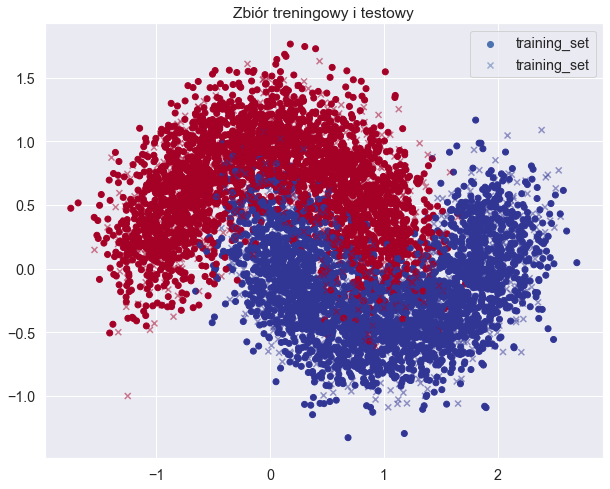

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdYlBu', label='training_set')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu', marker='x', alpha=.5, label='training_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()

### Budowa modelu

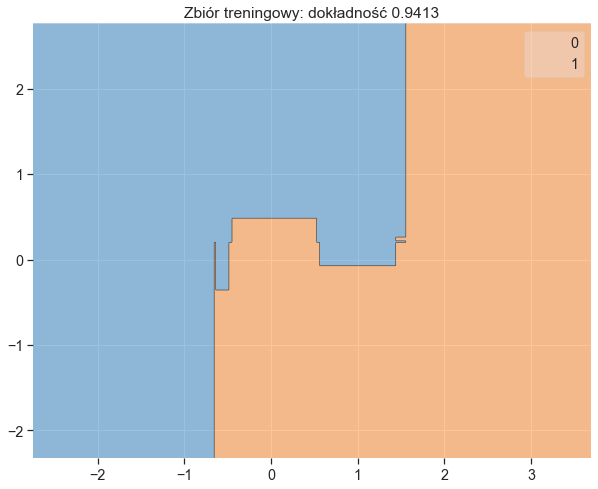

In [7]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classifier, scatter_kwargs = {'alpha': 0})
# plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

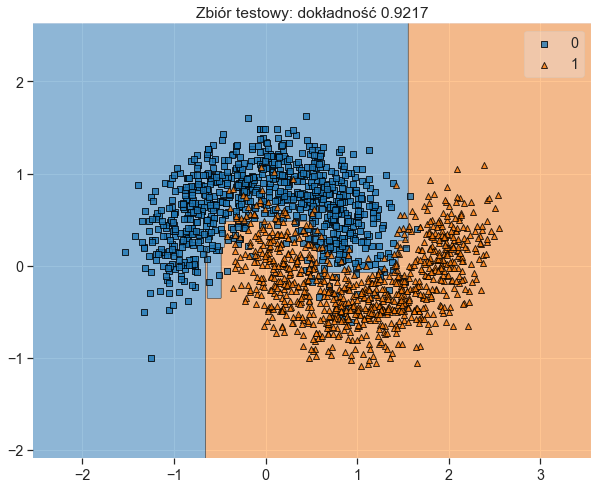

In [8]:
plt.figure(figsize=(10,8))
# plot_decision_regions(X_train, y_train, classifier, scatter_kwargs = {'alpha': 0})
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

### Walidacja krzyżowa

In [9]:
from sklearn.model_selection import cross_val_score

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
scores

array([0.92571429, 0.91238095, 0.92571429, 0.93714286, 0.95047619,
       0.92190476, 0.95047619, 0.9447619 , 0.93904762, 0.94666667])

In [10]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.9354 (+/- 0.0126)


In [11]:
classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=15)
scores

array([0.93714286, 0.92285714, 0.90857143, 0.92      , 0.94      ,
       0.93428571, 0.94571429, 0.94571429, 0.9       , 0.94571429,
       0.94      , 0.94857143, 0.94285714, 0.92571429, 0.95714286])

In [12]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.9343 (+/- 0.0153)


In [13]:
scores = pd.DataFrame(scores, columns=['accuracy'])
scores

accuracy
0   0.937143
1   0.922857
2   0.908571
3   0.920000
4   0.940000
5   0.934286
6   0.945714
7   0.945714
8   0.900000
9   0.945714
10  0.940000
11  0.948571
12  0.942857
13  0.925714
14  0.957143

In [14]:
accu = scores.mean()[0]
std_ = scores.std()[0]

px.bar(data_frame=scores, y=scores.accuracy, color='accuracy', width=700, height=400,
       title=f'Walidacja krzyżowa (15 podziałów) | Accuracy: {accu:.4f} (+/-) {std_:.4f}',
       color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[scores.min()[0] - 0.01, 1.0])